<center><h1> EEE485 HW3 </h1></center>

**Kazim Sanlav**

In [1]:
import scipy.io as sio
import numpy as np
from numpy.linalg import inv
from sklearn import preprocessing
from numpy import linalg as LA 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Latex

### Q2

### Part (c)

In [2]:
q2 = pd.read_csv('student.csv', header=None)

In [3]:
q2.head()

,0,1,2,3
0,1,1426.0,3.61,3
1,1,1277.5,3.67,3
2,1,2104.7,4.00,1
3,1,1534.0,3.19,4
4,1,2634.8,2.93,4


In [4]:
def logit(x):
    '''
    x: vector of input
    '''
    return x/(1+x) 

In [5]:
def gradient_decent(X,y):
    '''
    Gradient decent algorithm
    X:  Design matrix [1 x_1;...;1 x_n]
    y:  True response [y_1,...,y_n]
    pi: [pi_1...pi_n] where pi_i = Pr(Y_i=1|X_i=x_i)
    '''

    treshhold = 0.01
    lrate = 10^-1 #learning rate
    converged = False
    beta = np.zeros((2,1)) # inital weights
    i = 0 # step number
    
    
    while not converged and i < 100:
        i+=1 
        #beta_n+1 = beta_n - lamda*gradient_NLL_beta_n
        #gradient = X.T(pi-y)
        pi = logit(np.exp(X@beta)) #pi
        gradient_NLL = (X.T@(pi-y)) #gradient
        beta -= lrate*gradient_NLL #parameter update
        
        if (LA.norm(gradient_NLL)<treshhold):
            converged = True
        if (i%10 == 0):
            print(gradient_NLL)
#             print('step:',i,' beta:',beta)
    return beta #maximum likelihood estimate of beta
        

In [6]:
# add ones to first column of X
q2_X = np.asarray(q2.loc[:,1])
q2_X/=1000
a = np.ones((400,2))
a[:,1] = q2_X
q2_X = a

q2_Y = np.asarray(q2.loc[:,0])
q2_Y = np.reshape(q2_Y,(400,1)) #response variable

In [7]:
gradient_decent(q2_X,q2_Y)

[[-200.     ]
 [-334.67436]]
[[-200.     ]
 [-334.67436]]
[[-200.     ]
 [-334.67436]]
[[-200.     ]
 [-334.67436]]
[[-200.     ]
 [-334.67436]]
[[-200.     ]
 [-334.67436]]
[[-200.     ]
 [-334.67436]]
[[-200.     ]
 [-334.67436]]
[[-200.     ]
 [-334.67436]]
[[-200.     ]
 [-334.67436]]


array([[-217712.00000188],
       [-365521.61664147]])

### Q3

In [11]:
df_train = sio.loadmat('PS2Q3train.mat')
df_train = np.concatenate((df_train['x_tr'],df_train['y_tr']), axis = 1)
df_train = pd.DataFrame(df_train, columns=['X','Y'])
df_test = sio.loadmat('PS2Q3test.mat')
df_test = np.concatenate((df_test['x_te'],df_test['y_te']), axis = 1)
df_test = pd.DataFrame(df_test, columns=['X','Y'])

In [9]:
df_train.head()

,X,Y
0,-0.627295,0.304737
1,-1.859568,-0.951721
2,-1.761680,-1.059035
3,0.210733,0.049572
4,-1.679922,-0.688042


Text(0.5,1,'Train Data')

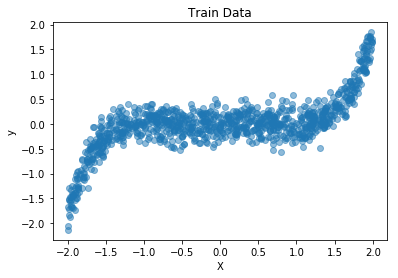

In [10]:
plt.plot(df_train.X,df_train.Y,'o',alpha = 0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Train Data')

In [164]:
df_test.head()

,X,Y
0,-1.448637,-0.238349
1,0.956413,-0.027134
2,-0.282732,-0.350744
3,-1.700539,-0.731897
4,-1.938974,-1.320550


Text(0.5,1,'Test Data')

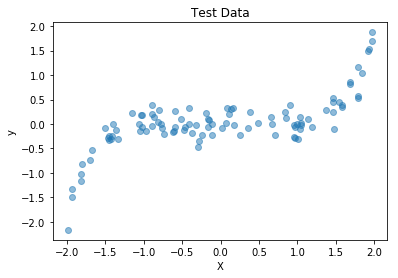

In [165]:
plt.plot(df_test.X,df_test.Y,'o',alpha = 0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Test Data')

### Part (a)

We will use Polynomial Regression with $p \in \{1,...,10\}$ such as:

$$
Y = \beta_0 + \beta_1X + \beta_2X^2 + ... + \beta_pX^p + \epsilon 
$$

$$
\mathcal{D} := \{(x_i,y_i)\}_{i=1}^n \in \mathbb{R}
$$



\begin{equation}
\begin{bmatrix}
    y_1 \\
    y_1 \\
    \vdots \\
    y_n \\
\end{bmatrix} = \begin{bmatrix}
    x_{1}       & x_1^2 & \dots & x_1^p \\
    x_{2}       & x_2^2 & \dots & x_2^p \\
    \vdots      &\vdots & \ddots & \vdots \\
    x_{n}       & x_n^2 & \dots & x_n^p
\end{bmatrix} 
\begin{bmatrix}
    \beta_0 \\
    \beta_1 \\
    \vdots \\
    \beta_p \\
\end{bmatrix} + 
\begin{bmatrix}
    \epsilon_1 \\
    \epsilon_2 \\
    \vdots \\
    \epsilon_n \\ 
\end{bmatrix}
\end{equation}

Least Square solution of this equation is:
$$
\hat{\beta} = (X^TX)^{-1}X^Ty
$$

We will write a function for solving least-square estimate.

In [166]:
def least_square_estimate(X,y):
    '''
    X:Design matrix
    y:True response
    '''
    X = X if isinstance(X,np.ndarray) else np.asarray(X)
    y = y if isinstance(y,np.ndarray) else np.asarray(y)
    b_hat = inv(X.T@X)@X.T@y
    return b_hat

Vandermond matrix:

In [167]:
def X_design(X, p=1):
    return np.vander(X, p+1, increasing=True)

In [168]:
def predict(X,Beta,y_hat = None):
    if y_hat: # mean of Dtrain
        return X@Beta + y_hat
    return X@Beta

In [169]:
def MSE(y_hat,y):
    return (y_hat - y).T@(y_hat - y)/(y.shape[0])

We will calculate the $\hat{y}$ for $p \in{1,...,10}$

In [170]:
def plot_MSE(X_tr,y_tr,X_te,y_te,p):
    training_errors = []
    test_errors = []
    
    for i in range(p):
        X_des = X_design(X_tr,i) #vandermond
        beta_hat = least_square_estimate(X_des,y_tr) #beta hat 
        training_errors.append(MSE(predict(X_des,beta_hat),y_tr)) #train error
        test_errors.append(MSE(predict(X_design(X_te,i),beta_hat),y_te))  #test error
        
    plt.plot(training_errors, marker='.', color='blue', linewidth=2, label='train error')
    plt.plot(test_errors, marker='.', color='red', linewidth=2, label='test error')
    # Add legend
    plt.legend()

    # Add titles
    plt.title("Train&Test Errors")
    plt.ylabel("MSE")
    plt.xlabel(r'$p$')




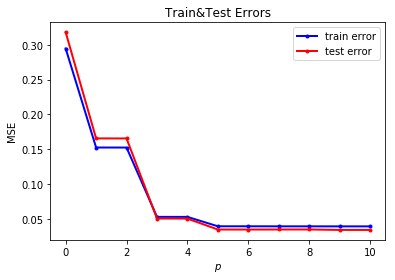

In [171]:
plot_MSE(df_train.X,df_train.Y,df_test.X,df_test.Y,p=11)

$p=5$ is the optimal value because it has the lowest test error, performance does not  
improve beyond it.

### Part (b)

In [172]:
def standardize(X,y,mean=None,std=None):
    '''
    Standardize X,
    Centralize y
    '''
    if(mean and std): # standardize test data with mean and std of Dtrain
        X_std = (X-mean)/std
        mean_y = np.mean(y)
    else:   
        mean_x = np.mean(X, axis=0)
        std_x = np.std(X, axis=0)
        mean_y = np.mean(y)

        X_std = (X-mean_x)/std_x
    
    return (X_std, mean_y)

In [173]:
def least_square_est_ridge(X,y,lmd):
    '''
    X:Design matrix
    y:True response
    lmd:Lambda,regularization parameter
    '''
        
    X = X if isinstance(X,np.ndarray) else np.asarray(X)
    y = y if isinstance(y,np.ndarray) else np.asarray(y)
    
    #dont standardize the first column of vandermond(all 1s)
    b = np.ones((X.shape[0],X.shape[1]))
    b[:,1:] = standardize(X[:,1:],y)[0]
    X = b
       
    b_hat = inv(X.T@X+np.identity(X.shape[1])*lmd)@X.T@y
    return b_hat

In [174]:
def standardize_test(X,y,mean,std):
        
    X = X if isinstance(X,np.ndarray) else np.asarray(X)
    y = y if isinstance(y,np.ndarray) else np.asarray(y)
    
    #dont standardize the first column of vandermond(all 1s)
    b = np.ones((X.shape[0],X.shape[1]))
    b[:,1:] = standardize(X[:,1:],y,mean,std)[0]
    X = b
    y = standardize(X[:,1:],y,mean,std)[1]
    
    return (X,y)

In [179]:
def plot_MSE_ridge(X_tr,y_tr,X_te,y_te,p):
    
    y_hat = y = standardize(X_tr,y_tr)[1] # mean of response on Dtrain
    lmd = range(101) #lambda
    training_errors = []
    test_errors = []
    
    for i in lmd:
        X_des = X_design(X_tr,p) #vandermond train data
        X_des_te = X_design(X_te,p) #vandermond test data
        beta_hat = least_square_est_ridge(X_des,y_tr,i) #beta hat 
        
        training_errors.append(MSE(predict(X_des,beta_hat,y_hat),y_tr)) #train error
        
    
#         X_des_te = standardize_test(X_des_te, y_tr, mean_tr, std_tr)
        
        test_errors.append(MSE(predict(X_des_te,beta_hat,y_hat),y_te))  #test error
        
    plt.plot(training_errors, marker='.', color='blue', linewidth=2, label='train error')
    plt.plot(test_errors, marker='.', color='red', linewidth=2, label='test error')
    # Add legend
    plt.legend()
    
    # Add titles
    plt.title("Train&Test Errors")
    plt.ylabel("MSE")
    plt.xlabel(r'$\lambda$')




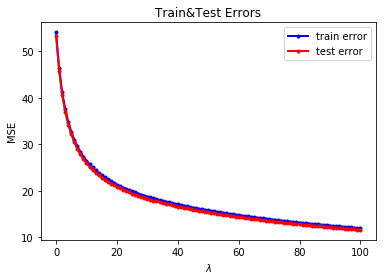

In [180]:
plot_MSE_ridge(df_train.X,df_train.Y,df_test.X,df_test.Y,p=5)

Lambda 100 seems to have lower error

### Q4

### part(b)

In [177]:
q4_train = sio.loadmat('PS2Q4.mat')
q4_X = q4_train['x_tr']
q4_Y = q4_train['y_tr']


In [ ]:
X=q4_X.reshape(1000,1)
Y=q4_Y.reshape(1000,1)
# Initialize beta
beta = np.zeros((2,1))
# Initialize mu
mu = np.zeros((1000,1))

# initialize gradient
gradient = X.T@(mu-Y)

# initialize epsilon
epsilon = 0.0001
# initialize eta
learningrate = 10^(-5)

while((gradient.T@gradient) > epsilon ):
  # update beta
  beta = beta - learningrate*(X.T@(mu-Y))
  # update mu
  for k in range(mu.shape[0]):
    mu[k] = np.exp(beta[0] + beta[1] * (X[k]))
  
  # Calculte gradient
  gradient = X.T@(mu-Y)
  
#   # Update 
#   maxIterations = maxIterations-1
  
  # Print 
  print(gradient.T@gradient)